In [36]:
# LDA (linear discriminant analysis) Model

# 5 Methods:
# Chi-Squared
# Tree-Based
# L1 Regularization
# Variance Threshold
# RFE

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

celeb_data = pd.read_csv('list_attr_celeba.csv')

celeb_data.replace(1, 1.0, inplace=True)
celeb_data.replace(-1, 0.0, inplace=True)
celeb_data.drop(columns = ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie'], inplace=True)

celeb_data.head()

column_names = celeb_data.drop("Attractive", axis=1).columns
X = celeb_data.drop("Attractive", axis=1).values
y = celeb_data["Attractive"].values

In [38]:
# Chi-Squared
# x^2 = summation((observed(i) - expected(i)^2) / expected(i))

# feature selection
selector = SelectKBest(chi2, k=10)  # top 10 most relevant features
X_new = selector.fit_transform(X, y)

# distiguish with feature names
selected_features = column_names[selector.get_support()]
print("Features:", selected_features)

# training and testing split 70/30
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# training LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred))

Features: Index(['Big_Nose', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Gray_Hair',
       'Heavy_Makeup', 'Male', 'Pointy_Nose', 'Wavy_Hair', 'Young'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     29734
           1       0.77      0.72      0.74     31046

    accuracy                           0.75     60780
   macro avg       0.75      0.75      0.75     60780
weighted avg       0.75      0.75      0.75     60780



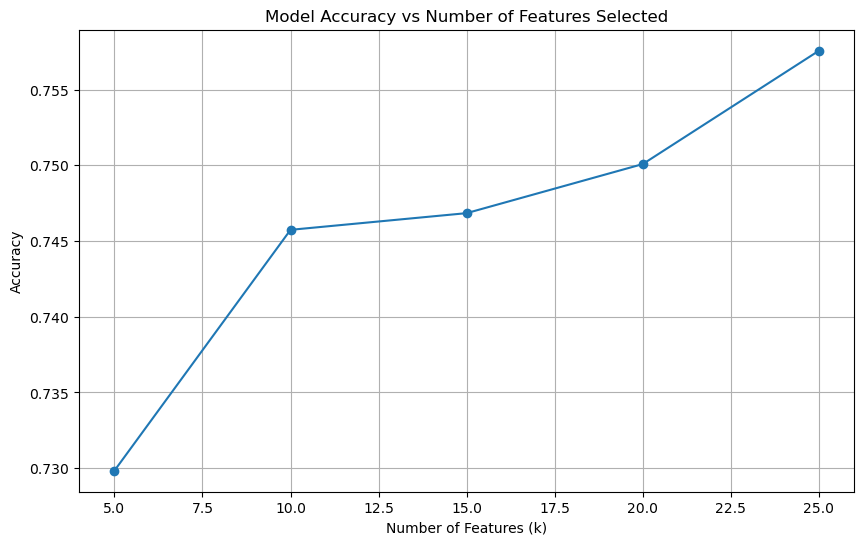

In [39]:
celeb_data = pd.read_csv('list_attr_celeba.csv')

celeb_data.replace(1, 1.0, inplace=True)
celeb_data.replace(-1, 0.0, inplace=True)

celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes',
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open',
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
    'Wearing_Necktie'
], inplace=True)

X = celeb_data.drop("Attractive", axis=1).values
y = celeb_data["Attractive"].values
column_names = celeb_data.drop("Attractive", axis=1).columns

results = []
k_values = range(5, len(column_names) + 1, 5)  # test in increments of 5

for k in k_values:
    selector = SelectKBest(chi2, k=k)  # top k features
    X_new = selector.fit_transform(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    y_pred = lda.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, results, marker='o')
plt.title('Model Accuracy vs Number of Features Selected')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [40]:
# K features from most relevant to least relevant for model accuracy
# Bald
# Big_Lips
# Big_Nose
# Blond_Hair
# Brown_Hair
# Chubby
# Double_Chin
# Eyeglasses
# Goatee
# Gray_Hair
# Heavy_Makeup
# High_Cheekbones
# Male
# Mustache
# Narrow_Eyes
# No_Beard
# Oval_Face
# Pale_Skin
# Pointy_Nose
# Receding_Hairline
# Rosy_Cheeks
# Sideburns
# Straight_Hair
# Wavy_Hair
# Young

In [41]:
# chi-squared values
chi2_scores, p_values = chi2(X, y)
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_importance)

              Feature    Chi2 Score        P-Value
11       Heavy_Makeup  28271.052943   0.000000e+00
13               Male  18385.501513   0.000000e+00
2            Big_Nose  11904.828502   0.000000e+00
6              Chubby  10713.529035   0.000000e+00
8          Eyeglasses   9393.708775   0.000000e+00
7         Double_Chin   8435.048004   0.000000e+00
10          Gray_Hair   7904.040885   0.000000e+00
19        Pointy_Nose   7629.404734   0.000000e+00
25              Young   6895.274619   0.000000e+00
24          Wavy_Hair   6371.880541   0.000000e+00
20  Receding_Hairline   5952.041000   0.000000e+00
17          Oval_Face   5454.974070   0.000000e+00
21        Rosy_Cheeks   5082.716829   0.000000e+00
0                Bald   4211.602687   0.000000e+00
4          Blond_Hair   4134.993162   0.000000e+00
9              Goatee   4081.602611   0.000000e+00
14           Mustache   3815.858803   0.000000e+00
5          Brown_Hair   2808.678556   0.000000e+00
12    High_Cheekbones   2454.34

In [43]:
# # Compute Chi-Square scores for all features
# chi2_scores, p_values = chi2(X, y)
# feature_importance = pd.DataFrame({
#     'Feature': column_names,
#     'Chi2 Score': chi2_scores,
#     'P-Value': p_values
# })

# # Filter Chi-Square scores for selected features
# filtered_feature_importance = feature_importance[feature_importance['Feature'].isin(selected_features)]

# # Reindex to ensure alignment with the order of selected features
# filtered_feature_importance = filtered_feature_importance.set_index('Feature').reindex(selected_features).reset_index()

# # Verify that selected features from Chi-Square align with LDA
# assert len(filtered_feature_importance) == len(selected_features), "Mismatch between Chi-Square and selected features"

# # Calculate LDA coefficients for the selected features
# lda_coefficients = pd.DataFrame({
#     'Feature': selected_features,
#     'Coefficient': lda.coef_[0]  # LDA is binary, so one set of coefficients
# })

# # Merge Chi-Square and LDA results for comparison
# combined_importance = pd.merge(filtered_feature_importance, lda_coefficients, on='Feature')

# # Sort combined importance by Chi-Square scores
# combined_importance = combined_importance.sort_values(by='Chi2 Score', ascending=False)

# # Display the combined importance
# print(combined_importance)

#NOT WORKING#


ValueError: All arrays must be of the same length

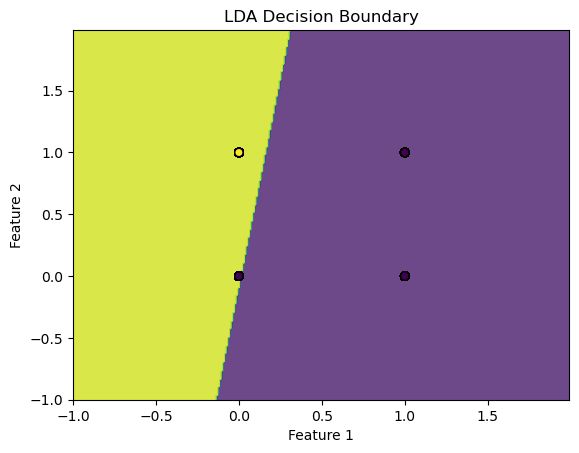

In [ ]:
# decision boundary

import numpy as np
import matplotlib.pyplot as plt

X_selected = X_new[:, :2]  # two features for simplicity
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lda.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
plt.title('LDA Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [44]:
# Accuracy of Chi-Squared with LDA model
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred_test = lda.predict(X_test)

# Calculate accuracy
lda_accuracy = accuracy_score(y_test, y_pred_test)

print(f"The accuracy of the LDA model with Chi-Squared feature selection is: {lda_accuracy:.4f}")


The accuracy of the LDA model with Chi-Squared feature selection is: 0.7576
